# Distance dependence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geopy.distance import geodesic
import random

pd.options.mode.chained_assignment = None

## Number of steps needed ##

We can look at the number of steps needed to take to reach the destination node from the starting node.

In [2]:
more_than_100_samples = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/more_than_100_samples.csv')
more_than_1000_samples = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/more_than_1000_samples.csv')
more_than_500_samples = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/more_than_500_samples.csv')

In [3]:
intra_city_100_la = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/intra_city_100_la.csv')
intra_city_1000_la = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/intra_city_1000_la.csv')
intra_city_500_la = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/intra_city_500_la.csv')

In [4]:
intra_city_100_ny = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/intra_city_100_ny.csv')
intra_city_1000_ny = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/intra_city_1000_ny.csv')
intra_city_500_ny = pd.read_csv(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\twitter/intra_city_500_ny.csv')

In [5]:
data_big_r = [more_than_100_samples.iloc[:,3].values, more_than_500_samples.iloc[:,3].values,more_than_1000_samples.iloc[:,3].values]
data_small_r_la = intra_city_100_la.iloc[:,3].values, intra_city_100_la.iloc[:,3].values, intra_city_100_la.iloc[:,3].values
data_small_r_ny = intra_city_100_ny.iloc[:,3].values, intra_city_100_ny.iloc[:,3].values, intra_city_100_ny.iloc[:,3].values

In [6]:
titles = ['Number of steps needed in the 100 followers network', 'Number of steps needed in the 500 followers network', 'Number of steps needed in the 1000 followers network']

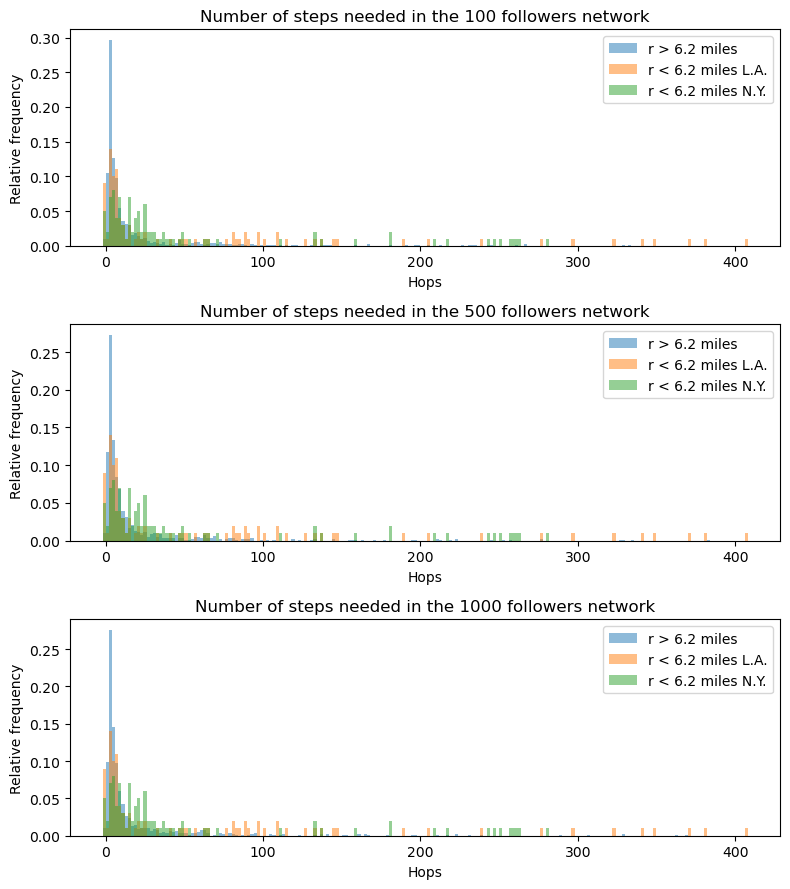

In [7]:
w=2
f,a = plt.subplots(3,figsize=(8, 9))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data_big_r[idx], alpha=0.5, weights=np.ones_like(data_big_r[idx]) / len(data_big_r[idx]), bins=np.arange(min(data_big_r[idx]), max(data_big_r[idx]) + w, w), label='r > 6.2 miles')
    ax.hist(data_small_r_la[idx], alpha=0.5, weights=np.ones_like(data_small_r_la[idx]) / len(data_small_r_la[idx]), bins=np.arange(min(data_small_r_la[idx]), max(data_small_r_la[idx]) + w, w), label='r < 6.2 miles L.A.')
    ax.hist(data_small_r_ny[idx], alpha=0.5, weights=np.ones_like(data_small_r_ny[idx]) / len(data_small_r_ny[idx]), bins=np.arange(min(data_small_r_ny[idx]), max(data_small_r_ny[idx]) + w, w), label='r < 6.2 miles N.Y.')    
    ax.set_title(titles[idx])
    ax.set_xlabel('Hops')
    ax.set_ylabel('Relative frequency')
    ax.legend()
plt.tight_layout()
plt.savefig('n_of_steps.png')
plt.show()

## Success rate

One question is wheter the success rate is different in the case of the shorter distances than the longer ones.

In [43]:
print('Success rate for long distances in the 100 follower network:',len(more_than_100_samples[more_than_100_samples.iloc[:,3] > 0]) / len(more_than_100_samples))
print('Success rate for long distances in the 1000 follower network:',len(more_than_1000_samples[more_than_1000_samples.iloc[:,3] > 0]) / len(more_than_1000_samples))
print('Success rate for long distances in the 500 follower network:',len(more_than_500_samples[more_than_500_samples.iloc[:,3] > 0]) / len(more_than_500_samples))

Success rate for long distances in the 100 follower network: 0.99
Success rate for long distances in the 1000 follower network: 0.989
Success rate for long distances in the 500 follower network: 0.99


In [44]:
print('Success rate for short distances in L.A. in the 100 follower network:',len(intra_city_100_la[intra_city_100_la.iloc[:,3] > 0]) / len(intra_city_100_la))
print('Success rate for short distances in L.A. in the 1000 follower network:',len(intra_city_1000_la[intra_city_1000_la.iloc[:,3] > 0]) / len(intra_city_1000_la))
print('Success rate for short distances in L.A. in the 500 follower network:',len(intra_city_500_la[intra_city_500_la.iloc[:,3] > 0]) / len(intra_city_500_la))

Success rate for short distances in L.A. in the 100 follower network: 0.91
Success rate for short distances in L.A. in the 1000 follower network: 0.97
Success rate for short distances in L.A. in the 500 follower network: 0.98


In [45]:
print('Success rate for short distances in N.Y. in the 100 follower network:',len(intra_city_100_ny[intra_city_100_ny.iloc[:,3] > 0]) / len(intra_city_100_ny))
print('Success rate for short distances in N.Y. in the 1000 follower network:',len(intra_city_1000_ny[intra_city_1000_ny.iloc[:,3] > 0]) / len(intra_city_1000_ny))
print('Success rate for short distances in N.Y. in the 500 follower network:',len(intra_city_500_ny[intra_city_500_ny.iloc[:,3] > 0]) / len(intra_city_500_ny))

Success rate for short distances in N.Y. in the 100 follower network: 0.95
Success rate for short distances in N.Y. in the 1000 follower network: 0.99
Success rate for short distances in N.Y. in the 500 follower network: 0.99
